In [201]:
import glob
import json
import pandas as pd
import numpy as np
import datetime
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
! cd .. && cabal install

In [ ]:
! cd .. && for i in {01..25}; do cabal run advent${i} --enable-profiling -- +RTS -N -pj -s -hT ; done

Build profile: -w ghc-9.2.5 -O1
In order, the following will be built (use -v for more details):
 - split-0.2.3.5 (lib) (requires build)
 - advent-of-code22-0.1.0.0 (exe:advent01)  --enable-profiling (configuration changed)
Starting     split-0.2.3.5 (lib)
Building     split-0.2.3.5 (lib)
Installing   split-0.2.3.5 (lib)
Completed    split-0.2.3.5 (lib)
Configuring executable 'advent01' for advent-of-code22-0.1.0.0..
Preprocessing executable 'advent01' for advent-of-code22-0.1.0.0..
Building executable 'advent01' for advent-of-code22-0.1.0.0..
[2 of 2] Compiling Main             ( advent01/Main.hs, /home/neil/Programming/advent-of-code-22/dist-newstyle/build/x86_64-linux/ghc-9.2.5/advent-of-code22-0.1.0.0/x/advent01/build/advent01/advent01-tmp/Main.dyn_o ) [Data.List.Split changed]
[1 of 2] Compiling AoC              ( src/AoC.hs, /home/neil/Programming/advent-of-code-22/dist-newstyle/build/x86_64-linux/ghc-9.2.5/advent-of-code22-0.1.0.0/x/advent01/build/advent01/advent01-tmp/AoC.p_o )

In [20]:
! rm ../times.csv
! rm ../times_raw.csv

rm: cannot remove '../times.csv': No such file or directory
rm: cannot remove '../times_raw.csv': No such file or directory


In [21]:
! cd .. && for i in {01..25}; do /usr/bin/time -f "%C,%S,%E,%M" -o times.csv -a cabal run advent${i}; done

Up to date
66719
198551
Up to date
13009
10398
Up to date
7727
2609
Up to date
513
878
Up to date
TGWSMRBPN
TZLTLWRNF
Up to date
1080
3645
Up to date
1084134
6183184
Up to date
1823
211680
Up to date
6243
2630
Up to date
15140
███  ███    ██  ██  ████  ██   ██  ███  
█  █ █  █    █ █  █    █ █  █ █  █ █  █ 
███  █  █    █ █  █   █  █    █  █ █  █ 
█  █ ███     █ ████  █   █ ██ ████ ███  
█  █ █    █  █ █  █ █    █  █ █  █ █    
███  █     ██  █  █ ████  ███ █  █ █    
 

Up to date
112815
25738411485
Up to date
468
459
Up to date
5675
20383
Up to date
644
27324
Up to date
5147333
13734006908372
Up to date
1792
2587
Up to date
3211
1589142857183
Up to date
3364
2006
Up to date
1199
3510
Build profile: -w ghc-9.2.5 -O1
In order, the following will be built (use -v for more details):
 - advent-of-code22-0.1.0.0 (exe:advent20) (file advent20/Main.hs changed)
Preprocessing executable 'advent20' for advent-of-code22-0.1.0.0..
Building executable 'advent20' for advent-of-code22-0.1.0.0..
[2 o

In [22]:
! cd .. && for i in {01..25}; do /usr/bin/time -f "%C,%S,%E,%M" -o times_raw.csv -a advent${i}; done

66719
198551
13009
10398
7727
2609
513
878
TGWSMRBPN
TZLTLWRNF
1080
3645
1084134
6183184
1823
211680
6243
2630
15140
███  ███    ██  ██  ████  ██   ██  ███  
█  █ █  █    █ █  █    █ █  █ █  █ █  █ 
███  █  █    █ █  █   █  █    █  █ █  █ 
█  █ ███     █ ████  █   █ ██ ████ ███  
█  █ █    █  █ █  █ █    █  █ █  █ █    
███  █     ██  █  █ ████  ███ █  █ █    
 

112815
25738411485
468
459
5675
20383
644
27324
5147333
13734006908372
1792
2587
3211
1589142857183
3364
2006
1199
3510
8721
831878881825
21120928600114
3453748220116
26558
110400
4236
1023
288
861
20==1==12=0111=2--20


In [26]:
!mv ../*prof .

In [27]:
!mv ../times.csv .

In [28]:
!mv ../times_raw.csv .

In [29]:
!mv ../*hp .

In [30]:
! for f in *hp ; do hp2ps ${f} ; done

/bin/bash: -c: line 1: syntax error near unexpected token `;'
/bin/bash: -c: line 1: ` for f in *hp ; do hp2ps $<_io.TextIOWrapper name='advent24.prof' mode='r' encoding='UTF-8'> ; done'


In [31]:
glob.glob('*prof')

['advent13.prof',
 'advent10.prof',
 'advent03.prof',
 'advent07.prof',
 'advent20.prof',
 'advent19.prof',
 'advent01.prof',
 'advent18.prof',
 'advent06.prof',
 'advent09.prof',
 'advent08.prof',
 'advent23.prof',
 'advent21.prof',
 'advent22.prof',
 'advent16.prof',
 'advent25.prof',
 'advent11.prof',
 'advent02.prof',
 'advent15.prof',
 'advent17.prof',
 'advent05.prof',
 'advent12.prof',
 'advent04.prof',
 'advent14.prof',
 'advent24.prof']

In [32]:
profs = []
for fn in glob.glob('*prof'):
    with open(fn) as f:
        j = json.load(f)
        prof = {}
        for n in 'program total_time total_alloc total_ticks initial_capabilities'.split():
            prof[n] = j[n]
        profs.append(prof)
profs

[{'program': 'advent13',
  'total_time': 0.08,
  'total_alloc': 10281760,
  'total_ticks': 264,
  'initial_capabilities': 12},
 {'program': 'advent10',
  'total_time': 0.01,
  'total_alloc': 631808,
  'total_ticks': 48,
  'initial_capabilities': 12},
 {'program': 'advent03',
  'total_time': 0.04,
  'total_alloc': 6018112,
  'total_ticks': 120,
  'initial_capabilities': 12},
 {'program': 'advent07',
  'total_time': 0.03,
  'total_alloc': 3049136,
  'total_ticks': 108,
  'initial_capabilities': 12},
 {'program': 'advent20',
  'total_time': 116.93,
  'total_alloc': 55860434768,
  'total_ticks': 398748,
  'initial_capabilities': 12},
 {'program': 'advent19',
  'total_time': 125807.27,
  'total_alloc': 1964531122296,
  'total_ticks': 429011004,
  'initial_capabilities': 12},
 {'program': 'advent01',
  'total_time': 0.06,
  'total_alloc': 11516576,
  'total_ticks': 192,
  'initial_capabilities': 12},
 {'program': 'advent18',
  'total_time': 0.36,
  'total_alloc': 68244096,
  'total_ticks': 1

In [158]:
performance = pd.DataFrame(profs).set_index('program').sort_index()
performance

total_time    total_alloc  total_ticks  initial_capabilities
program                                                               
advent01        0.06       11516576          192                    12
advent02        0.06        9613016          192                    12
advent03        0.04        6018112          120                    12
advent04        0.03        2913824           96                    12
advent05        0.02        3396888           84                    12
advent06        0.02        5025888           84                    12
advent07        0.03        3049136          108                    12
advent08        0.69      214597512         2352                    12
advent09        0.37       39708256         1248                    12
advent10        0.01         631808           48                    12
advent11        3.02      655812832        10308                    12
advent12        7.58     1598902400        25836                    12
advent13        0.08       10281760          264                    12
advent14        5.80      258169680        19788                    12
advent15    23014.42   126607950592     78480684                    12
advent16      910.42   296137053800      3104592                    12
advent17      198.34    77649009464       676368                    12
advent18        0.36       68244096         1224                    12
advent19   125807.27  1964531122296    429011004                    12
advent20      116.93    55860434768       398748                    12
advent21        1.97      351135824         6720                    12
advent22     3671.94   528445105288     12521556                    12
advent23     1977.02    26387446504      6741780                    12
advent24       18.13     3268072336        61836                    12
advent25        0.01         642496           48                    12

In [159]:
performance.total_ticks.plot.bar()

<AxesSubplot:xlabel='program'>

<AxesSubplot:xlabel='program'>

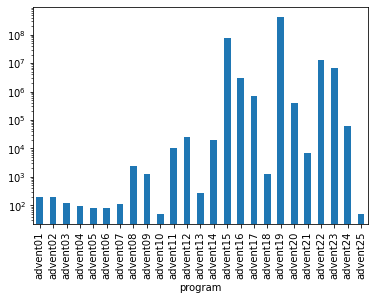

In [160]:
performance.total_ticks.plot.bar(logy=True)

<AxesSubplot:xlabel='program'>

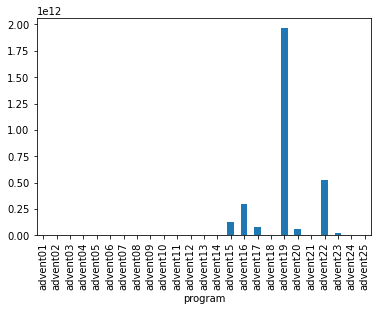

In [161]:
performance.total_alloc.plot.bar()

<AxesSubplot:xlabel='program'>

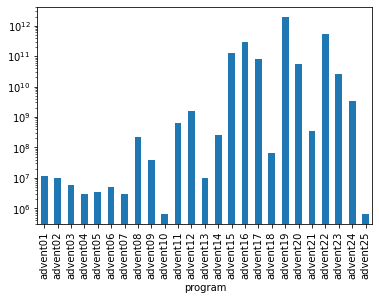

In [162]:
performance.total_alloc.plot.bar(logy=True)

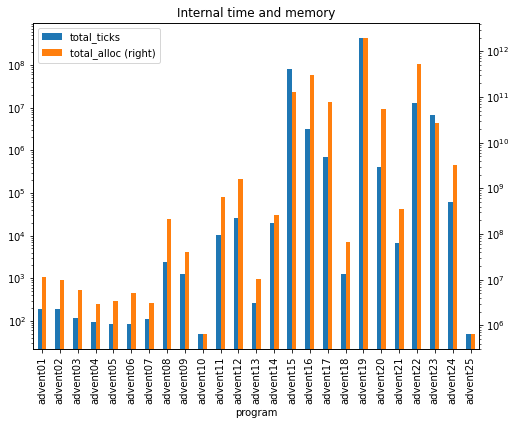

In [163]:
performance[['total_ticks', 'total_alloc']].plot.bar(
    logy=True, secondary_y=['total_alloc'], 
    figsize=(8, 6), title="Internal time and memory")
plt.savefig('internal_time_and_memory_log.png')

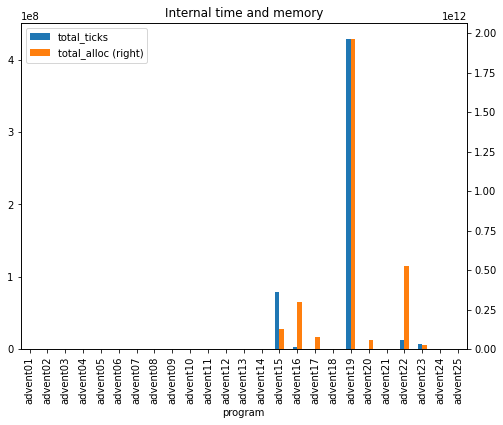

In [164]:
performance[['total_ticks', 'total_alloc']].plot.bar(
    logy=False, secondary_y=['total_alloc'], 
    figsize=(8, 6), title="Internal time and memory")
plt.savefig('internal_time_and_memory_linear.png')

In [165]:
# times = pd.read_csv('times.csv', 
#                     names=['program', 'system', 'elapsed', 'memory'], 
#                     index_col='program')
# times.index = times.index.str.slice(start=len('cabal run '))
# times.elapsed = pd.to_numeric(times.elapsed.str.slice(start=2))
# times

In [166]:
today = datetime.date.today()
today = datetime.datetime(year=today.year, month=today.month, day=today.day) - datetime.timedelta(seconds=1)
today

datetime.datetime(2022, 12, 26, 23, 59, 59)

In [167]:
epoch = datetime.datetime(year=1900, month=1, day=1)
epoch

datetime.datetime(1900, 1, 1, 0, 0)

In [168]:
times = pd.read_csv('times_raw.csv', 
                    names=['program', 'system', 'elapsed', 'memory'], 
                    index_col='program')
times.elapsed = (pd.to_datetime(times.elapsed, format="%M:%S.%f") - epoch)
times.elapsed = times.elapsed.apply(lambda x: x.total_seconds())
times

system  elapsed    memory
program                            
advent01    0.00     0.02     10488
advent02    0.00     0.02     11112
advent03    0.00     0.02     10408
advent04    0.00     0.01      9040
advent05    0.01     0.01      9324
advent06    0.01     0.02     10124
advent07    0.00     0.01      9192
advent08    0.02     0.09     12204
advent09    0.01     0.06     23660
advent10    0.00     0.01      6800
advent11    0.07     0.36     66664
advent12    0.06     1.09     13264
advent13    0.01     0.01     12300
advent14    0.01     0.85     15068
advent15   20.65   137.27  18101260
advent16   15.74   144.64     45628
advent17    3.94    20.67     22000
advent18    0.02     0.06     14060
advent19   87.22  1134.12  14295324
advent20    2.81    15.04     13940
advent21    0.02     0.40     12680
advent22    0.02     0.23     15908
advent23    1.87   370.18     13628
advent24    0.24     2.74     74820
advent25    0.00     0.01      5896

In [169]:
times.dtypes

system     float64
elapsed    float64
memory       int64
dtype: object

In [170]:
times.describe()

system      elapsed        memory
count  25.000000    25.000000  2.500000e+01
mean    5.309200    73.117600  1.313392e+06
std    17.799571   235.410442  4.513418e+06
min     0.000000     0.010000  5.896000e+03
25%     0.000000     0.020000  1.040800e+04
50%     0.020000     0.090000  1.326400e+04
75%     0.240000     2.740000  2.200000e+04
max    87.220000  1134.120000  1.810126e+07

In [171]:
performance = performance.merge(times, left_index=True, right_index=True)
# performance.drop(index='advent15loop', inplace=True)
performance

total_time    total_alloc  total_ticks  initial_capabilities  \
program                                                                  
advent01        0.06       11516576          192                    12   
advent02        0.06        9613016          192                    12   
advent03        0.04        6018112          120                    12   
advent04        0.03        2913824           96                    12   
advent05        0.02        3396888           84                    12   
advent06        0.02        5025888           84                    12   
advent07        0.03        3049136          108                    12   
advent08        0.69      214597512         2352                    12   
advent09        0.37       39708256         1248                    12   
advent10        0.01         631808           48                    12   
advent11        3.02      655812832        10308                    12   
advent12        7.58     1598902400        25836                    12   
advent13        0.08       10281760          264                    12   
advent14        5.80      258169680        19788                    12   
advent15    23014.42   126607950592     78480684                    12   
advent16      910.42   296137053800      3104592                    12   
advent17      198.34    77649009464       676368                    12   
advent18        0.36       68244096         1224                    12   
advent19   125807.27  1964531122296    429011004                    12   
advent20      116.93    55860434768       398748                    12   
advent21        1.97      351135824         6720                    12   
advent22     3671.94   528445105288     12521556                    12   
advent23     1977.02    26387446504      6741780                    12   
advent24       18.13     3268072336        61836                    12   
advent25        0.01         642496           48                    12   

          system  elapsed    memory  
program                              
advent01    0.00     0.02     10488  
advent02    0.00     0.02     11112  
advent03    0.00     0.02     10408  
advent04    0.00     0.01      9040  
advent05    0.01     0.01      9324  
advent06    0.01     0.02     10124  
advent07    0.00     0.01      9192  
advent08    0.02     0.09     12204  
advent09    0.01     0.06     23660  
advent10    0.00     0.01      6800  
advent11    0.07     0.36     66664  
advent12    0.06     1.09     13264  
advent13    0.01     0.01     12300  
advent14    0.01     0.85     15068  
advent15   20.65   137.27  18101260  
advent16   15.74   144.64     45628  
advent17    3.94    20.67     22000  
advent18    0.02     0.06     14060  
advent19   87.22  1134.12  14295324  
advent20    2.81    15.04     13940  
advent21    0.02     0.40     12680  
advent22    0.02     0.23     15908  
advent23    1.87   370.18     13628  
advent24    0.24     2.74     74820  
advent25    0.00     0.01      5896

In [172]:
performance.columns

Index(['total_time', 'total_alloc', 'total_ticks', 'initial_capabilities',
       'system', 'elapsed', 'memory'],
      dtype='object')

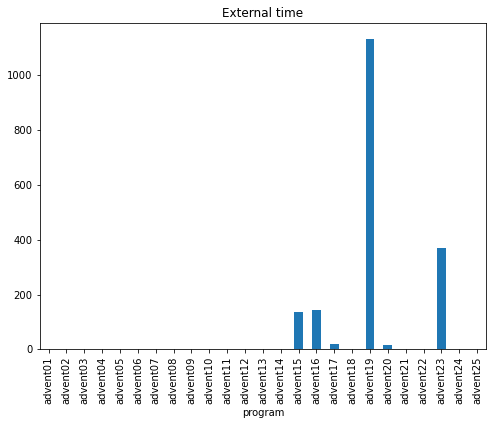

In [173]:
# performance[['total_ticks', 'elapsed']].plot.bar(logy=True)
performance.elapsed.plot.bar(
    figsize=(8, 6), title="External time")
plt.savefig('external_time.png')

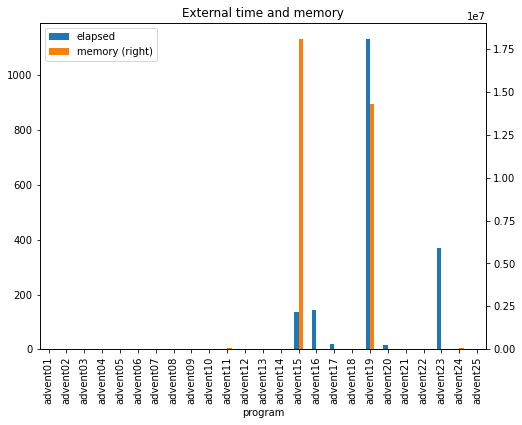

In [174]:
# performance[['total_ticks', 'elapsed']].plot.bar(logy=True)
performance[['elapsed', 'memory']].plot.bar(
    logy=False, secondary_y=['memory'], 
    figsize=(8, 6), title="External time and memory")
plt.savefig('external_time_and_memory.png')

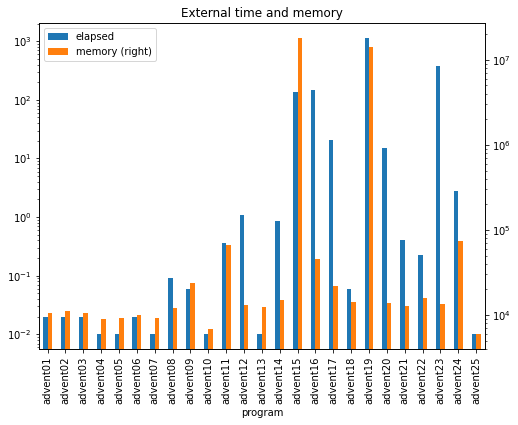

In [175]:
# performance[['total_ticks', 'elapsed']].plot.bar(logy=True)
performance[['elapsed', 'memory']].plot.bar(
    logy=True, secondary_y=['memory'], 
    figsize=(8, 6), title="External time and memory")
plt.savefig('external_time_and_memory_log.png')

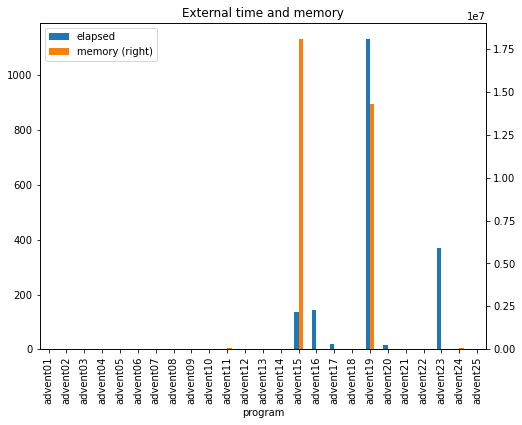

In [176]:
# performance[['total_ticks', 'elapsed']].plot.bar(logy=True)
performance[['elapsed', 'memory']].plot.bar(
    logy=False, secondary_y=['memory'], 
    figsize=(8, 6), title="External time and memory")
plt.savefig('external_time_and_memory_linear.png')

In [177]:
# performance[['total_ticks', 'elapsed']].plot.bar(logy=True)
performance[['total_ticks', 'elapsed']].plot.bar(
    logy=True, secondary_y=['elapsed'], 
    figsize=(8, 6), title="Internal vs external time")
plt.savefig('internal_external_time.png')

In [178]:
# performance[['total_ticks', 'elapsed']].plot.bar(logy=True)
performance[['total_ticks', 'elapsed']].plot.bar(
    logy=False, secondary_y=['elapsed'], 
    figsize=(8, 6), title="Internal vs external time")
plt.savefig('internal_external_time_linear.png')

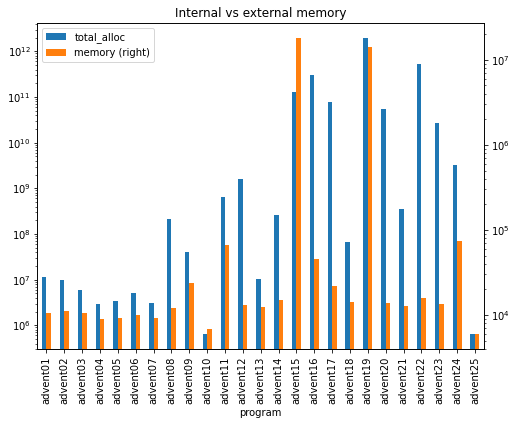

In [179]:
# performance[['total_ticks', 'elapsed']].plot.bar(logy=True)
performance[['total_alloc', 'memory']].plot.bar(
    logy=True, secondary_y=['memory'], 
    figsize=(8, 6), title="Internal vs external memory")
plt.savefig('internal_external_memory_log.png')

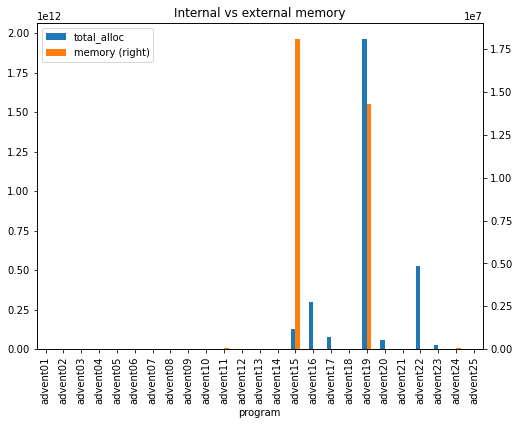

In [180]:
# performance[['total_ticks', 'elapsed']].plot.bar(logy=True)
performance[['total_alloc', 'memory']].plot.bar(
    logy=False, secondary_y=['memory'], 
    figsize=(8, 6), title="Internal vs external memory")
plt.savefig('internal_external_memory_linear.png')

In [181]:
# performance['elapsed_adj'] = performance['elapsed'] - 0.28
# performance

In [182]:
# performance[['total_time', 'elapsed_adj']].plot.bar(logy=True)

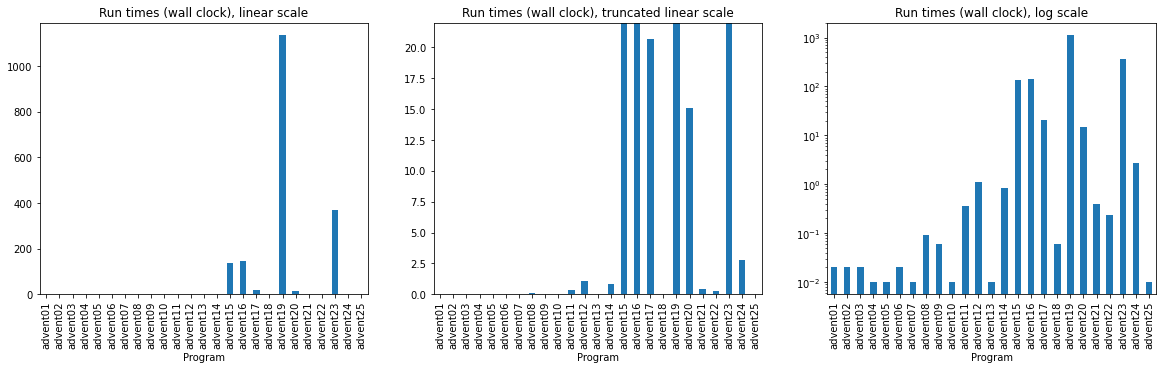

In [194]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

performance['elapsed'].plot.bar(ax=ax[2],
    logy=True, 
    title="Run times (wall clock), log scale",
#     figsize=(10,8)
    )
ax[2].set_xlabel('Program')

performance['elapsed'].plot.bar(ax=ax[0],
    logy=False, 
    title="Run times (wall clock), linear scale",
#     figsize=(10,8)
    )
ax[0].set_xlabel('Program')

performance['elapsed'].plot.bar(ax=ax[1],
    logy=False, 
    ylim=(0, 22),
    title="Run times (wall clock), truncated linear scale",
#     figsize=(10,8)
    )
ax[1].set_xlabel('Program')

plt.savefig('run_times_combined.png')

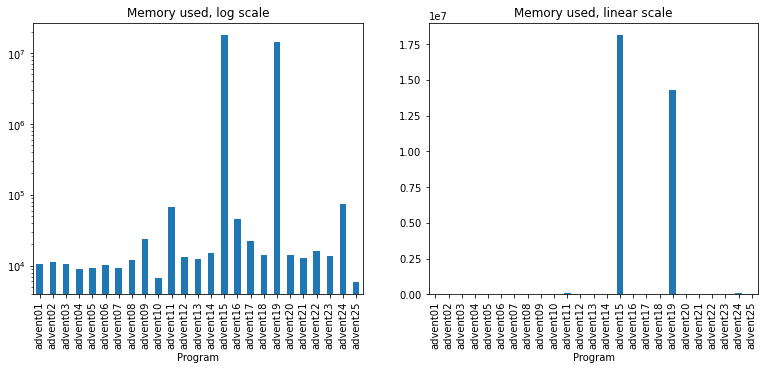

In [184]:
fig, ax = plt.subplots(ncols=2, figsize=(13,5))

performance['memory'].plot.bar(ax=ax[0],
    logy=True, 
    title="Memory used, log scale",
#     figsize=(10,8)
    )
ax[0].set_xlabel('Program')

performance['memory'].plot.bar(ax=ax[1],
    logy=False, 
    title="Memory used, linear scale",
#     figsize=(10,8)
    )
ax[1].set_xlabel('Program')

plt.savefig('memory_combined.png')

In [251]:
fig, ax = plt.subplots(ncols=2, figsize=(13,5))

performance[['total_alloc', 'memory']].plot.bar(ax=ax[0],
    logy=False, secondary_y=['memory'], 
    title="Internal vs external memory, linear scale")
ax[0].set_xlabel('Program')

performance[['total_alloc', 'memory']].plot.bar(ax=ax[1],
    logy=True, secondary_y=['memory'], 
    title="Internal vs external memory. log scale")

plt.savefig('internal_external_memory_combined.png')

In [185]:
# ax = performance['elapsed_adj'].plot.bar(logy=False, 
#     title="Run times (wall clock), linear scale",
#     figsize=(10,8))
# ax.set_xlabel('Program')
# plt.savefig('run_times_linear.png')

In [186]:
performance.columns

Index(['total_time', 'total_alloc', 'total_ticks', 'initial_capabilities',
       'system', 'elapsed', 'memory'],
      dtype='object')

<AxesSubplot:xlabel='program'>

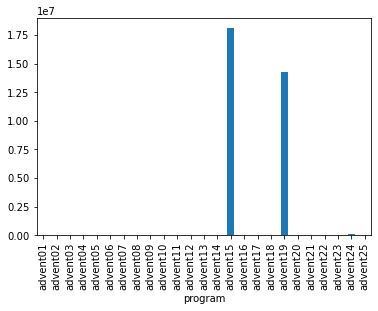

In [187]:
performance['memory'].plot.bar()

<AxesSubplot:xlabel='elapsed', ylabel='total_alloc'>

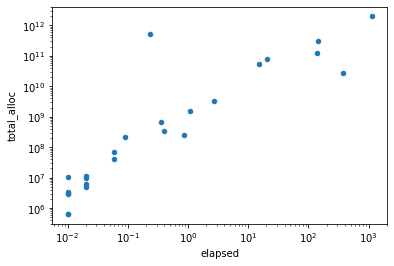

In [188]:
performance.plot.scatter('elapsed', 'total_alloc', logx=True, logy=True)

<AxesSubplot:xlabel='memory', ylabel='total_alloc'>

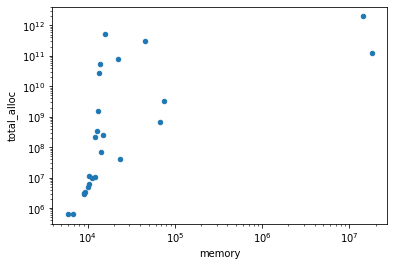

In [189]:
performance.plot.scatter('memory', 'total_alloc', logx=True, logy=True)

<AxesSubplot:xlabel='elapsed', ylabel='total_ticks'>

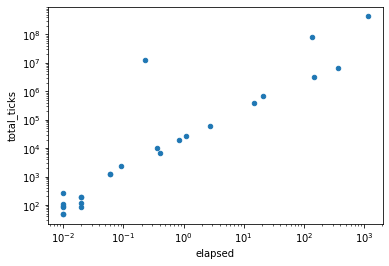

In [190]:
performance.plot.scatter('elapsed', 'total_ticks', logx=True, logy=True)

In [191]:
performance[['total_alloc', 'memory', 'elapsed']].to_csv('performance.csv')

In [192]:
print(performance[['total_alloc', 'elapsed', 'memory']].to_markdown(floatfmt=['0.0f', '0.0f', '.2f', '0.0f']))

| program   |   total_alloc |   elapsed |   memory |
|:----------|--------------:|----------:|---------:|
| advent01  |      11516576 |      0.02 |    10488 |
| advent02  |       9613016 |      0.02 |    11112 |
| advent03  |       6018112 |      0.02 |    10408 |
| advent04  |       2913824 |      0.01 |     9040 |
| advent05  |       3396888 |      0.01 |     9324 |
| advent06  |       5025888 |      0.02 |    10124 |
| advent07  |       3049136 |      0.01 |     9192 |
| advent08  |     214597512 |      0.09 |    12204 |
| advent09  |      39708256 |      0.06 |    23660 |
| advent10  |        631808 |      0.01 |     6800 |
| advent11  |     655812832 |      0.36 |    66664 |
| advent12  |    1598902400 |      1.09 |    13264 |
| advent13  |      10281760 |      0.01 |    12300 |
| advent14  |     258169680 |      0.85 |    15068 |
| advent15  |  126607950592 |    137.27 | 18101260 |
| advent16  |  296137053800 |    144.64 |    45628 |
| advent17  |   77649009464 |     20.67 |    2

In [232]:
line_counts = ! find .. -path ../dist-newstyle -prune -o -type f -name "Main.hs" -exec wc -l {} \;
count_names = [re.search("(\d+) \.\./([^/]+)", l).groups([2, 1]) for l in line_counts if 'advent' in l if 'Main' in l]
program_counts = pd.Series({n: int(c) for n, c in sorted([(c, n) for n, c in count_names])})
program_counts

advent01     22
advent02     93
advent03     51
advent04     57
advent05    105
advent06     30
advent07    137
advent08     76
advent09     97
advent10     76
advent11    148
advent12    155
advent13     61
advent14    107
advent15     91
advent16    274
advent17    171
advent18     72
advent19    221
advent20     56
advent21    118
advent22    269
advent23    215
advent24    224
advent25     52
dtype: int64

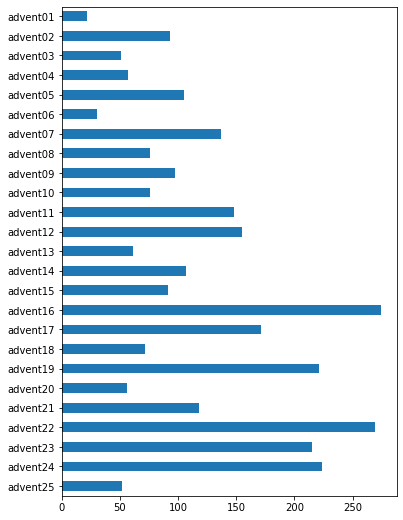

In [243]:
program_counts[::-1].plot.barh(figsize=(6, 9))
plt.savefig('lines_of_code.png')

In [236]:
print(program_counts.to_markdown())

|          |   0 |
|:---------|----:|
| advent01 |  22 |
| advent02 |  93 |
| advent03 |  51 |
| advent04 |  57 |
| advent05 | 105 |
| advent06 |  30 |
| advent07 | 137 |
| advent08 |  76 |
| advent09 |  97 |
| advent10 |  76 |
| advent11 | 148 |
| advent12 | 155 |
| advent13 |  61 |
| advent14 | 107 |
| advent15 |  91 |
| advent16 | 274 |
| advent17 | 171 |
| advent18 |  72 |
| advent19 | 221 |
| advent20 |  56 |
| advent21 | 118 |
| advent22 | 269 |
| advent23 | 215 |
| advent24 | 224 |
| advent25 |  52 |


In [245]:
program_counts.median()

97.0